# Learning Conways game of life

Let's first import stuff we need.

In [1]:
import numpy as np

Importing the pretrained model

In [2]:
from keras.models import load_model
#model = load_model('../trained_models/gol_manual_compiled.h5')
model = load_model('../trained_models/gol_learnt.h5')

Using TensorFlow backend.


Load the input image

In [3]:
from PIL import Image
im_data = Image.open('../example_data/gol_img/small.jpg')
raw_data = np.asarray(im_data, dtype='float32')/255

Display image

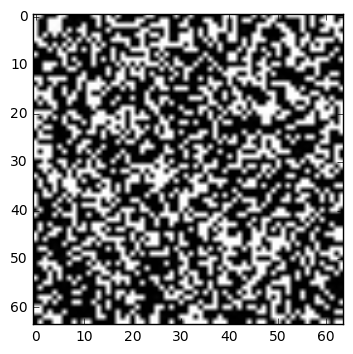

In [4]:
from matplotlib import pyplot
pyplot.imshow(im_data.convert('RGB'))
pyplot.show()

Reshape data for keras

In [5]:
from keras import backend as keras_backend
if keras_backend.image_dim_ordering() == 'th':
    input_data = raw_data.reshape(1, 1, 64, 64)
else:
    input_data = raw_data.reshape(1, 64, 64, 1)

Run the convolutional network

In [6]:
data = input_data
for i in range(130):
    input_data = data
    data = np.round(model.predict(data))

Display the result

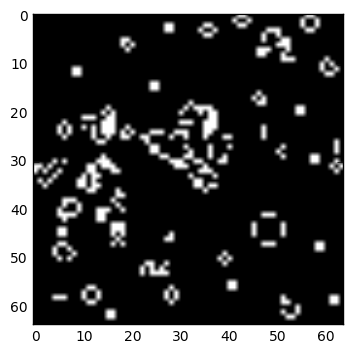

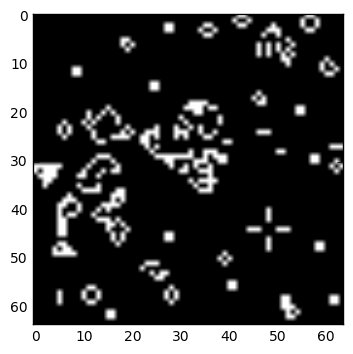

In [7]:
pyplot.imshow(Image.fromarray(input_data.reshape(64, 64) * 255).convert('RGB'))
pyplot.show()
pyplot.imshow(Image.fromarray(data.reshape(64, 64) * 255).convert('RGB'))
pyplot.show()

Let's see what is inside this network

In [8]:
from keras.models import Model

def show_layer(d, index):
    intermediate_model = Model(input=model.input, output=model.get_layer(model.layers[index].name).output)
    intermediate_result = intermediate_model.predict(d)

    filters = model.layers[index].output_shape[3]
    
    for i in range(filters):
        imd = np.transpose(np.swapaxes(intermediate_result.reshape(64, 64, filters), 0, 2)[i])
        imd = imd - np.amin(imd)
        if np.amax(imd) > 0:
            imd = imd / np.amax(imd)
        imd = imd * 255
        pyplot.imshow(Image.fromarray(imd).convert('RGB'))
        pyplot.show()

Layer: 0


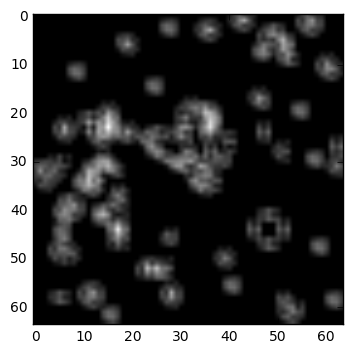

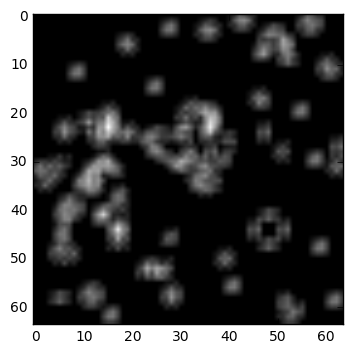

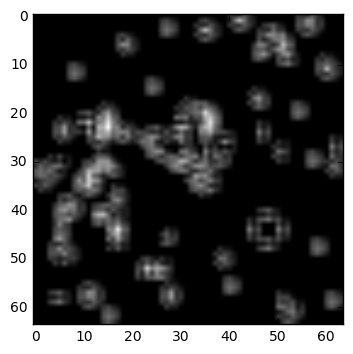

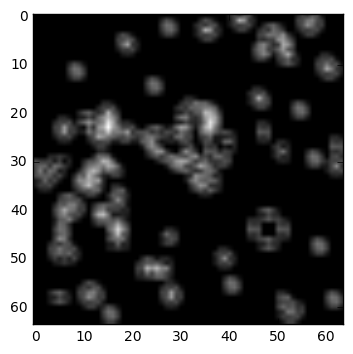

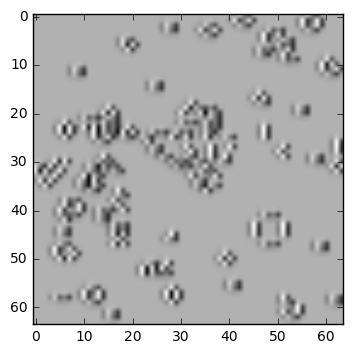

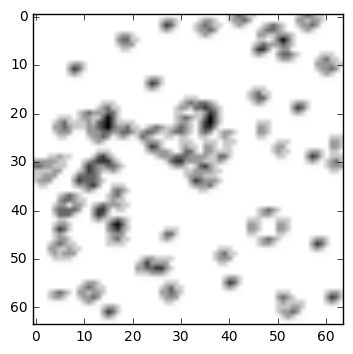

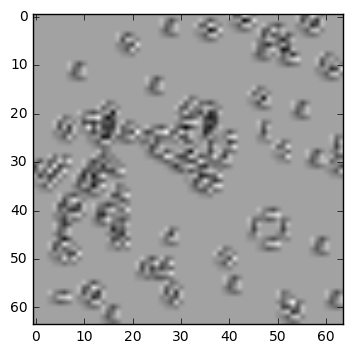

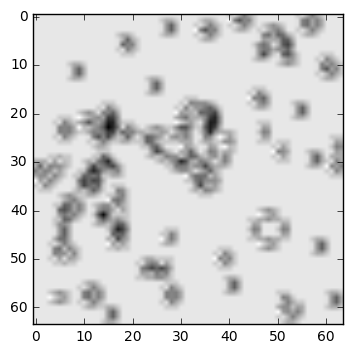

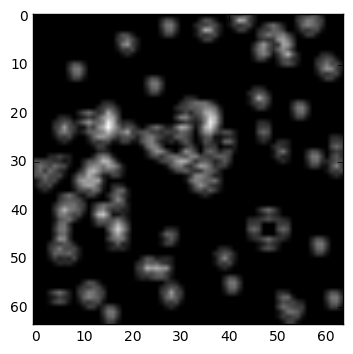

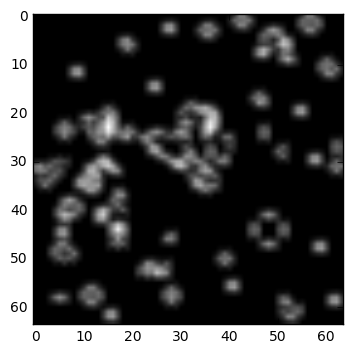

Layer: 1


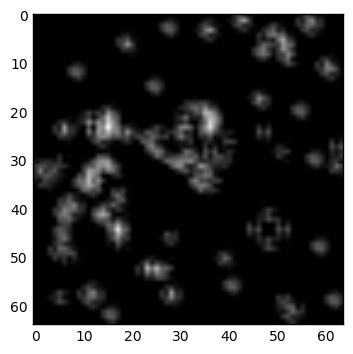

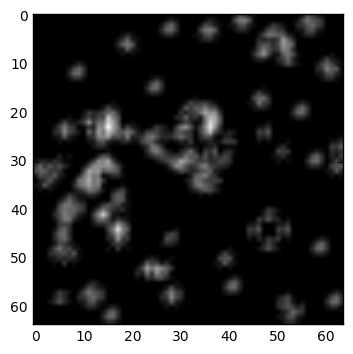

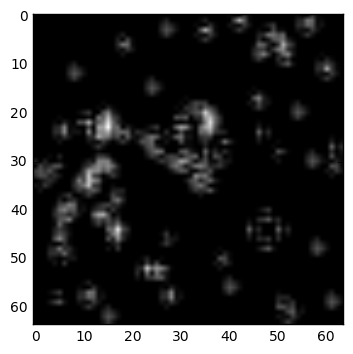

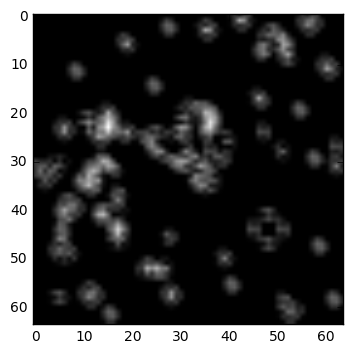

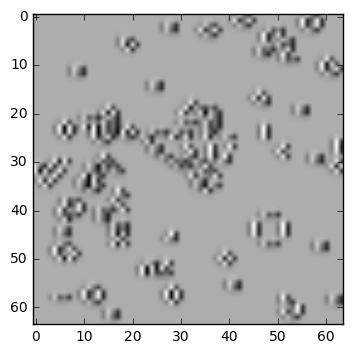

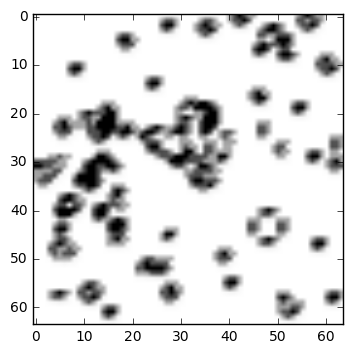

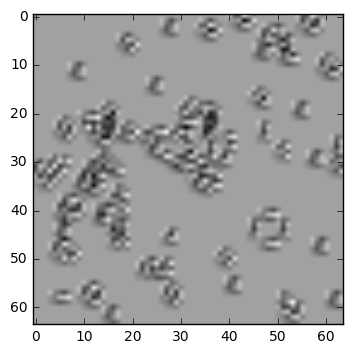

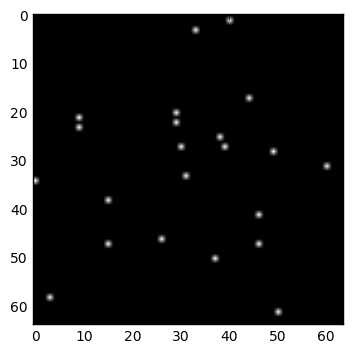

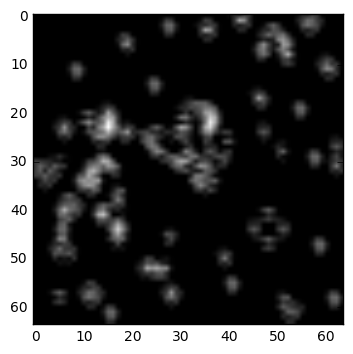

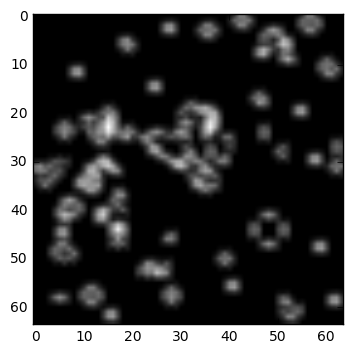

Layer: 2


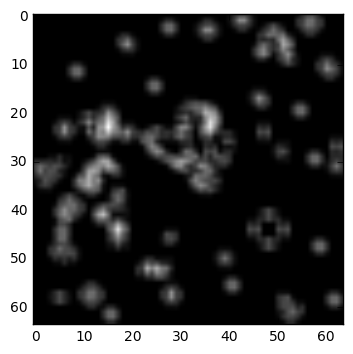

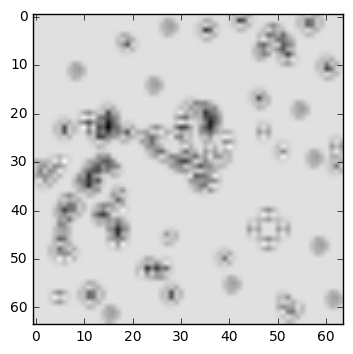

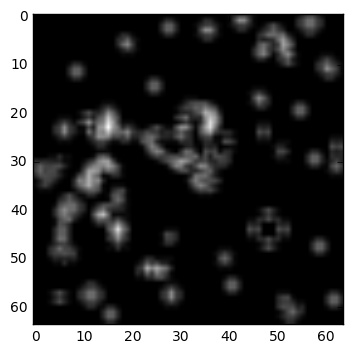

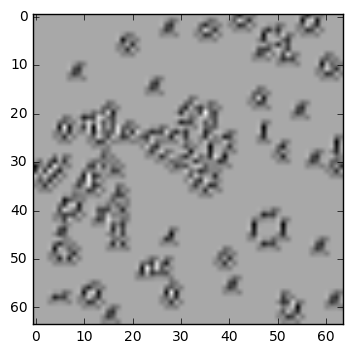

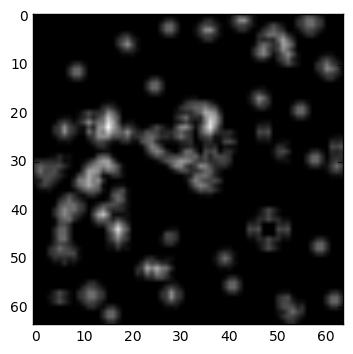

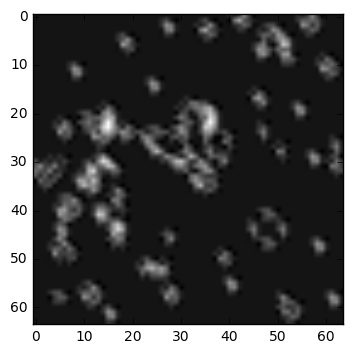

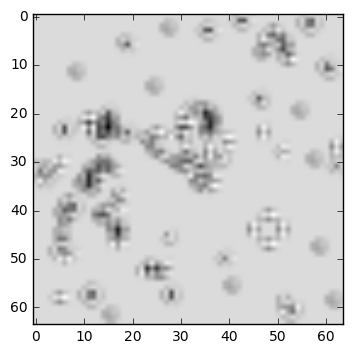

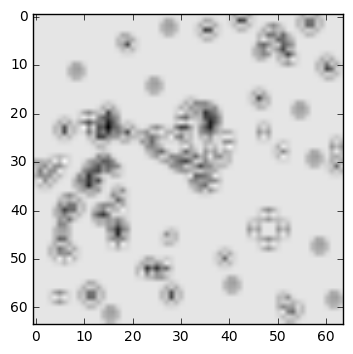

Layer: 3


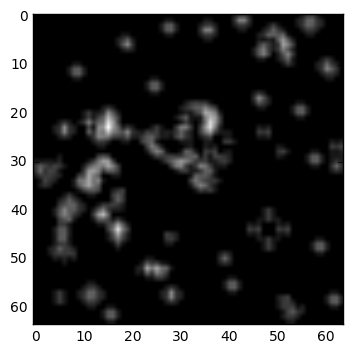

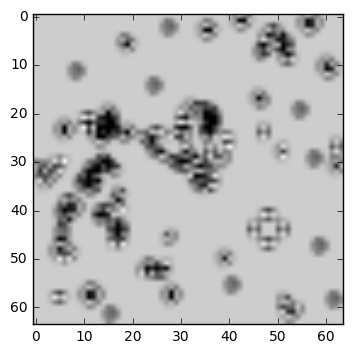

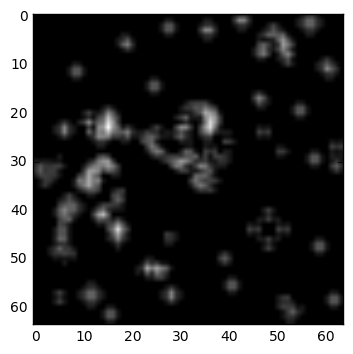

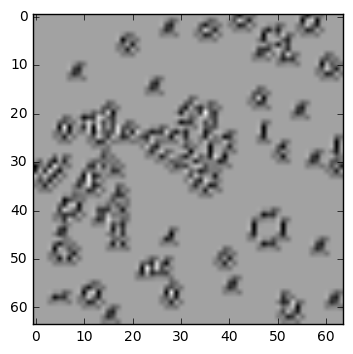

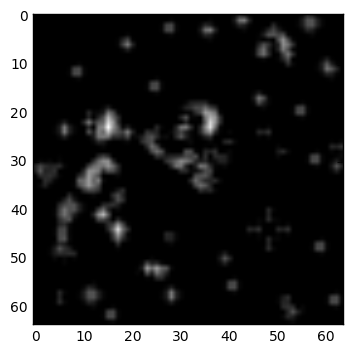

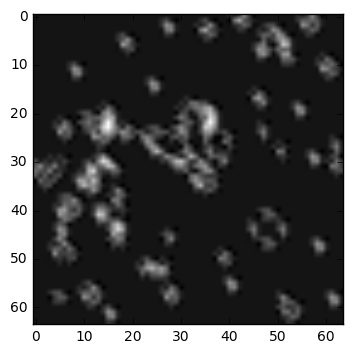

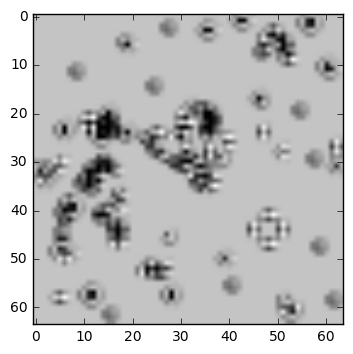

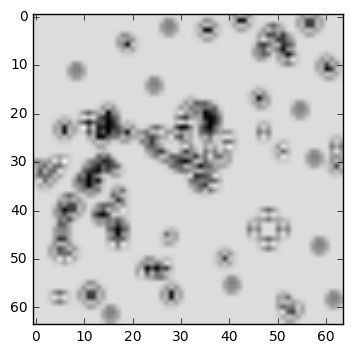

Layer: 4


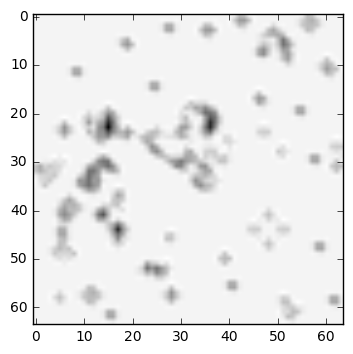

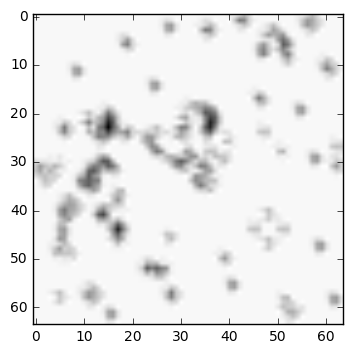

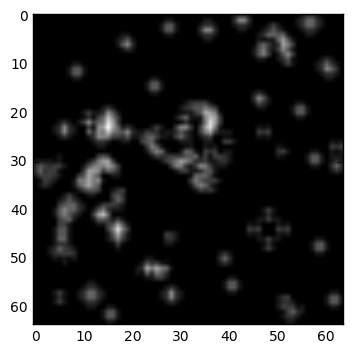

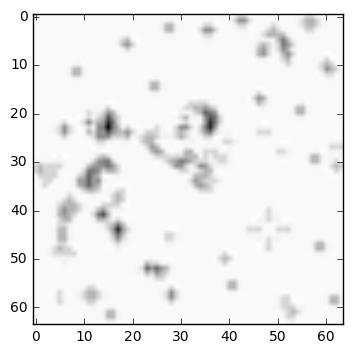

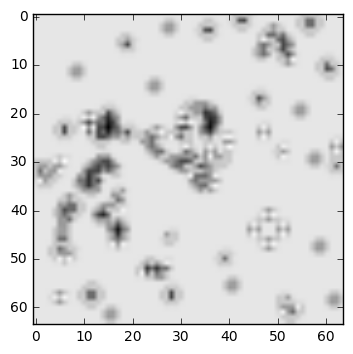

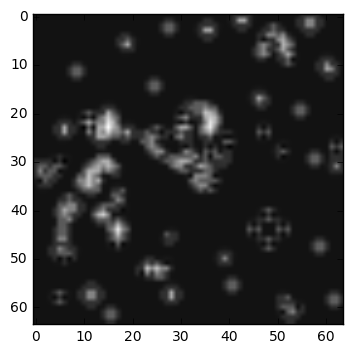

Layer: 5


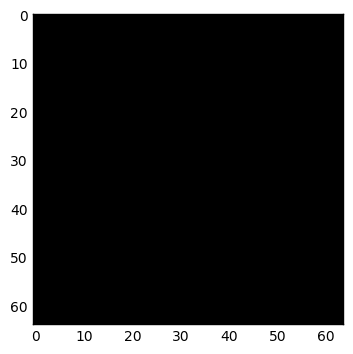

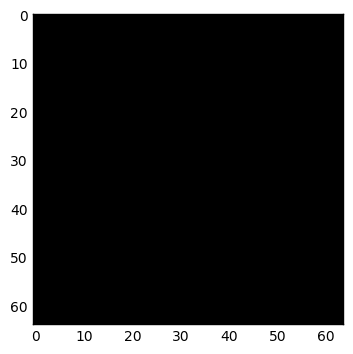

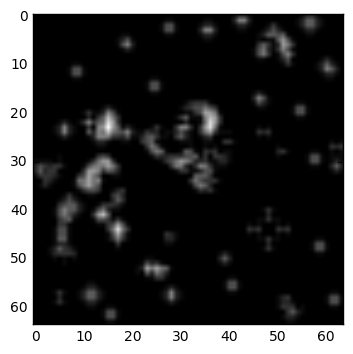

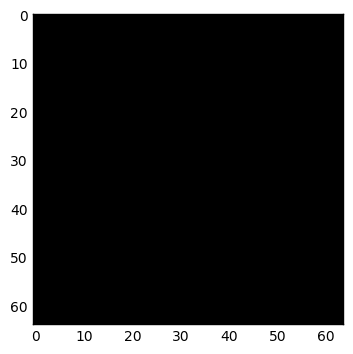

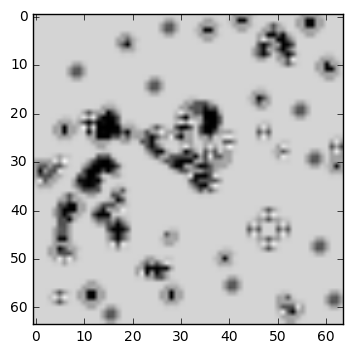

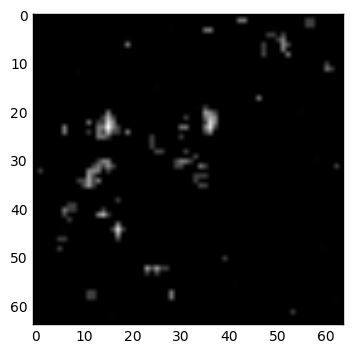

Layer: 6


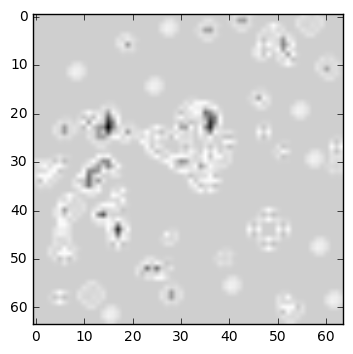

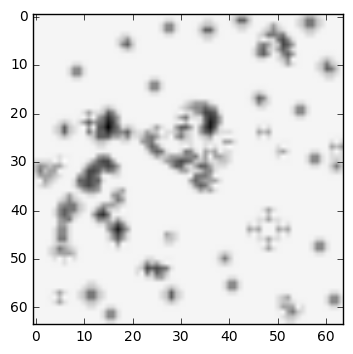

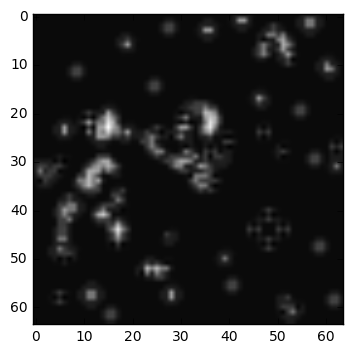

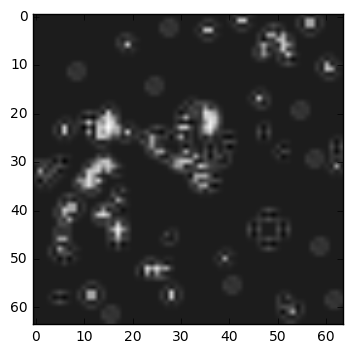

Layer: 7


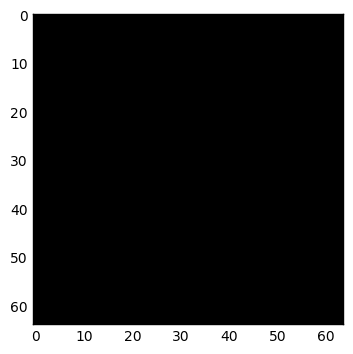

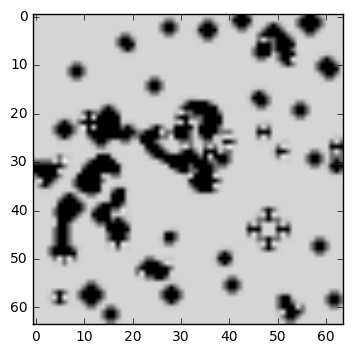

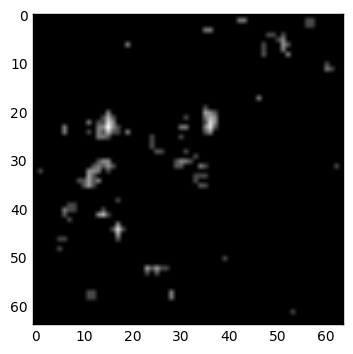

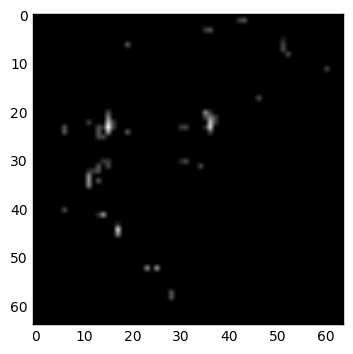

Layer: 8


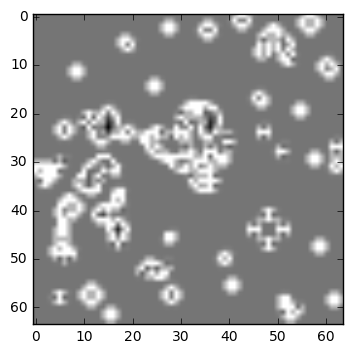

Layer: 9


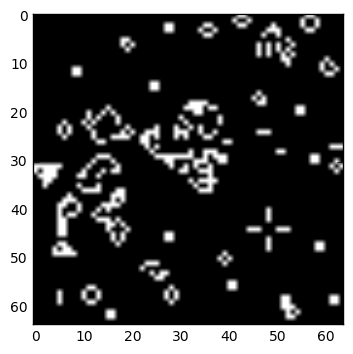

In [9]:
for j in range(10):
    print("Layer: " + str(j))
    show_layer(input_data, j)